In [4]:
# Import General Packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from scipy.stats import reciprocal
import warnings
import random
import joblib
import joblib
from PIL import Image
import glob

# Import sklearn Packages
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [5]:
# Import Tensorflow Packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier

# **Flower Species Classification**

In [3]:
# Define Class Labels
class_names = ['Roses', 'Magnolias', 'Lilies', 'Sunflowers', 'Orchids', 
               'Marigold', 'Hibiscus', 'Firebush', 'Pentas', 'Bougainvillea']

# Loading Training Data
X_train = np.load('flower_species_classification/data_train.npy').T
t_train = np.load('flower_species_classification/labels_train.npy')

# Load Test Data
X_test = np.load('flower_species_classification/data_test.npy').T
t_test = np.load('flower_species_classification/labels_test.npy')

print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(1658, 270000) (1658,)
(415, 270000) (415,)


In [4]:
flower_model = keras.models.load_model('flower_model.h5')
warnings.filterwarnings("ignore")

2022-12-09 18:00:48.915977: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 18:00:49.442731: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79111 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:b7:00.0, compute capability: 8.0


In [5]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

2022-12-09 18:01:03.069622: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-12-09 18:01:04.064481: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512
2022-12-09 18:01:04.212665: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-12-09 18:01:05.244682: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Classification Report: Training
               precision    recall  f1-score   support

        Roses       0.97      0.98      0.98       177
    Magnolias       0.99      1.00      1.00       180
       Lilies       0.98      0.98      0.98       205
   Sunflowers       1.00      0.99      0.99       140
      Orchids       0.99      0.98      0.99       173
     Marigold       1.00      0.99      1.00       156
     Hibiscus       0.97      0.99      0.98       160
     Firebush       0.98      0.98      0.98       172
       Pentas       0.98      0.98      0.98       162
Bougainvillea       0.98      0.98      0.98       133

     accuracy                           0.98      1658
    macro avg       0.98      0.98      0.98      1658
 weighted avg       0.98      0.98      0.98      1658



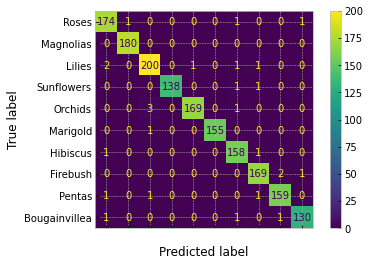

In [6]:
y_train = np.argmax(flower_model.predict(X_train.reshape(1658, 300,300,3)),axis=1)

print("\033[1mClassification Report: Training\033[0m")
from sklearn.metrics import classification_report
print(classification_report(t_train, y_train, target_names=class_names))

cm = confusion_matrix(t_train,y_train)
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                                     display_labels=class_names)
disp.plot()
plt.xticks(color='w')
plt.show()

warnings.filterwarnings("ignore")

Classification Report: Test
               precision    recall  f1-score   support

        Roses       0.83      0.79      0.81        48
    Magnolias       0.98      0.98      0.98        44
       Lilies       0.87      0.72      0.79        46
   Sunflowers       1.00      0.94      0.97        36
      Orchids       0.93      0.87      0.90        45
     Marigold       0.87      0.97      0.92        40
     Hibiscus       0.95      0.95      0.95        43
     Firebush       0.90      0.97      0.94        37
       Pentas       0.91      0.97      0.94        32
Bougainvillea       0.80      0.89      0.84        44

     accuracy                           0.90       415
    macro avg       0.90      0.91      0.90       415
 weighted avg       0.90      0.90      0.90       415



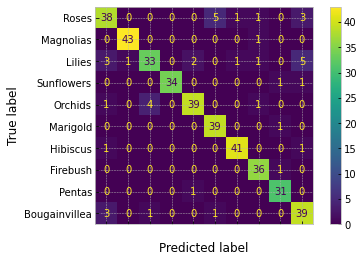

In [7]:
y_test = np.argmax(flower_model.predict(X_test.reshape(415, 300,300,3)),axis=1)

from sklearn.metrics import classification_report
print("\033[1mClassification Report: Test\033[0m")

print(classification_report(t_test, y_test, target_names=class_names))

cm = confusion_matrix(t_test,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                                     display_labels=class_names)
disp.plot()
plt.xticks(color='w')
plt.show()

warnings.filterwarnings("ignore")

---

---

# **Car Dataset**

## Car Classification

In [6]:
training_all = joblib.load('training_all.pkl')
image_train = joblib.load('image_list.pkl')

In [7]:
# Extract all Training Images with associated Image Number
test_all = []
image_test = []
# Extracts ALL Test images
for file_name in glob.glob('car_detection_dataset/testing_images/*.jpg'):
    
    # Extracts XXXXX value from 'vid_4_XXXXX.jpg' file name
    
    position1= file_name.index('5_')
    position2=file_name.index('.')
    file_number= file_name[position1+2:position2]
    test_all.append(file_number) # XXXXX Value for ALL Training images
    
    im=np.array(Image.open(file_name)).flatten()
    image_test.append(im) # ALL Training images in the form of a flattened array

image_test = np.array(image_test)

In [8]:
print(image_train.shape)
print(image_test.shape)

(1001, 770640)
(175, 770640)


In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(image_train)
X_test = scaler.transform(image_test)

In [10]:
car_clf_model = keras.models.load_model('car_clf_model.h5')

2022-12-10 14:11:04.626053: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-10 14:11:05.118107: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79111 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:4e:00.0, compute capability: 8.0


#### Classifier: Training

In [11]:
X_train_reduced = X_train[0:200]
y_train = np.argmax(car_clf_model.predict(X_train_reduced.reshape(200, 380,676,3)),axis=1)

2022-12-10 14:11:09.720819: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-12-10 14:11:10.888364: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512
2022-12-10 14:11:11.122526: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-12-10 14:11:12.098185: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Classification Report: Train
              precision    recall  f1-score   support

      No Car       0.90      0.99      0.94       121
         Car       0.99      0.84      0.90        79

    accuracy                           0.93       200
   macro avg       0.94      0.91      0.92       200
weighted avg       0.93      0.93      0.93       200



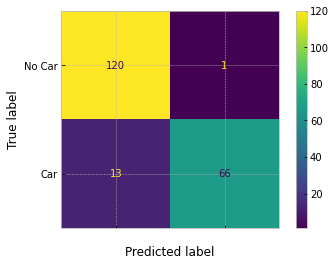

In [12]:
from sklearn.metrics import classification_report
print("\033[1mClassification Report: Train\033[0m")

print(classification_report(training_all[0:200,1], y_train, target_names=['No Car', 'Car']))

cm = confusion_matrix(training_all[0:200,1], y_train)
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                                     display_labels=['No Car', 'Car'])
disp.plot()
plt.xticks(color='w')
plt.show()

warnings.filterwarnings("ignore")

#### Classifier: Test

In [13]:
y_test = np.argmax(car_clf_model.predict(X_test.reshape(175, 380,676,3)),axis=1)
print(y_test)

[1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0
 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1
 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


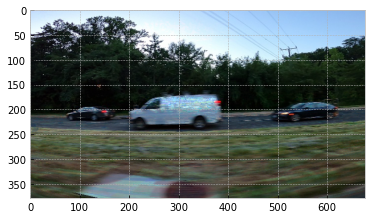

In [14]:
plt.imshow(X_test.reshape(175, 380,676,3)[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

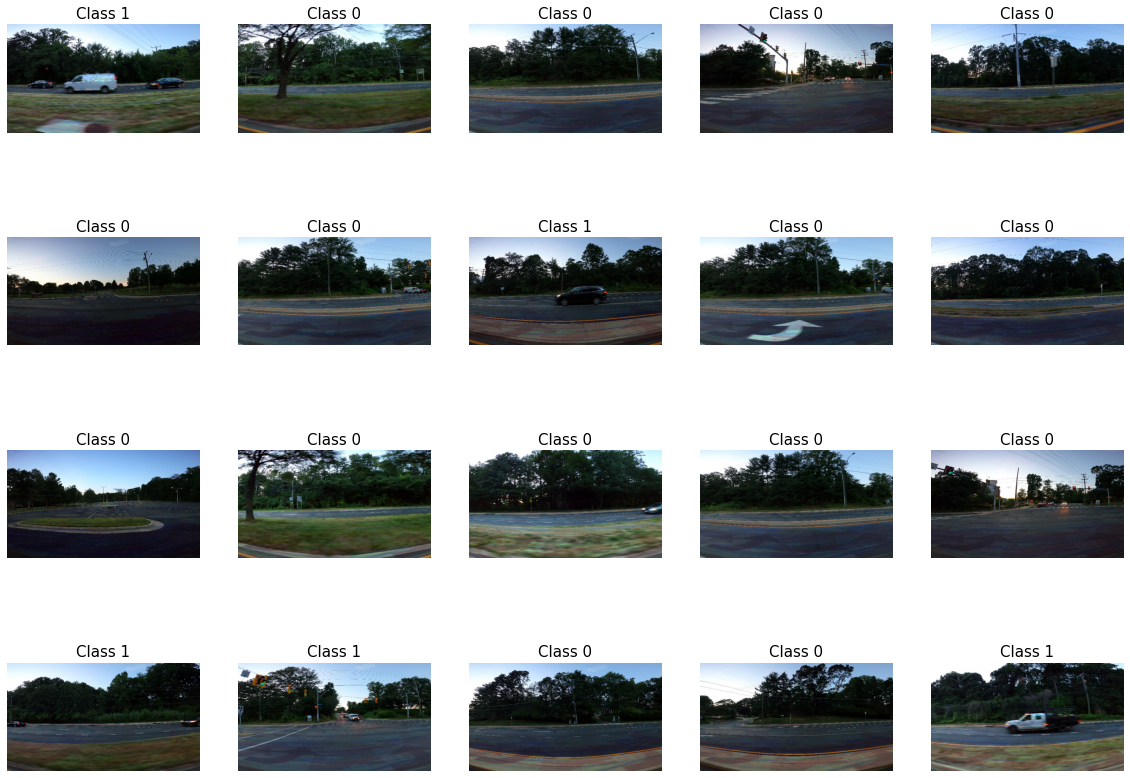

In [15]:
# Displaying some random examples per class
fig=plt.figure(figsize=(20,15))
for j in range(20):
    fig.add_subplot(4,5,j+1)
    plt.imshow(X_test.reshape((175,380,676,3))[j])
    plt.axis('off');plt.title('Class '+str(int(y_test[j])),size=15)
plt.show()

## Car Detection

In [17]:
car_true = np.where(training_all == 1)[0]
X_train_cars = image_train[car_true]

car_true = np.where(y_test == 1)
X_test_cars = X_test[car_true]

In [18]:
car_box_model = keras.models.load_model('car_clf_box.h5')

In [19]:
y_train = car_box_model.predict(X_train_cars.reshape(len(X_train_cars),380,676,3)).astype(int)
y_test = car_box_model.predict(X_test_cars.reshape(len(X_test_cars),380,676,3)).astype(int)

#### Visualize Detection: Training

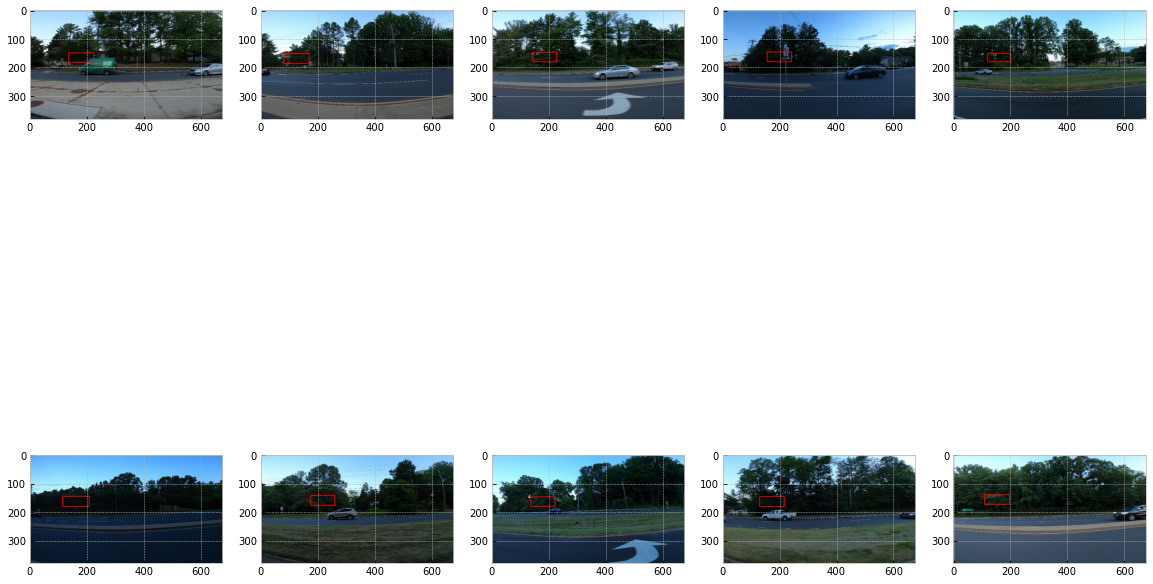

In [20]:
import cv2
# Displaying some random examples per class
fig=plt.figure(figsize=(20,15))
for i in range(10):
    fig.add_subplot(2,5,i+1)
    x= X_train_cars.reshape(len(X_train_cars),380,676,3)[i]
    cv2.rectangle(x, (y_train[i][0], y_train[i][1]), 
              (y_train[i][2], y_train[i][3]), 
              (255, 0, 0), 2);
    plt.imshow(x)
    # plt.axis('off');plt.title('Class '+str(int(y_test[j])),size=15)
plt.show()

#### Visualize Detection: Test

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

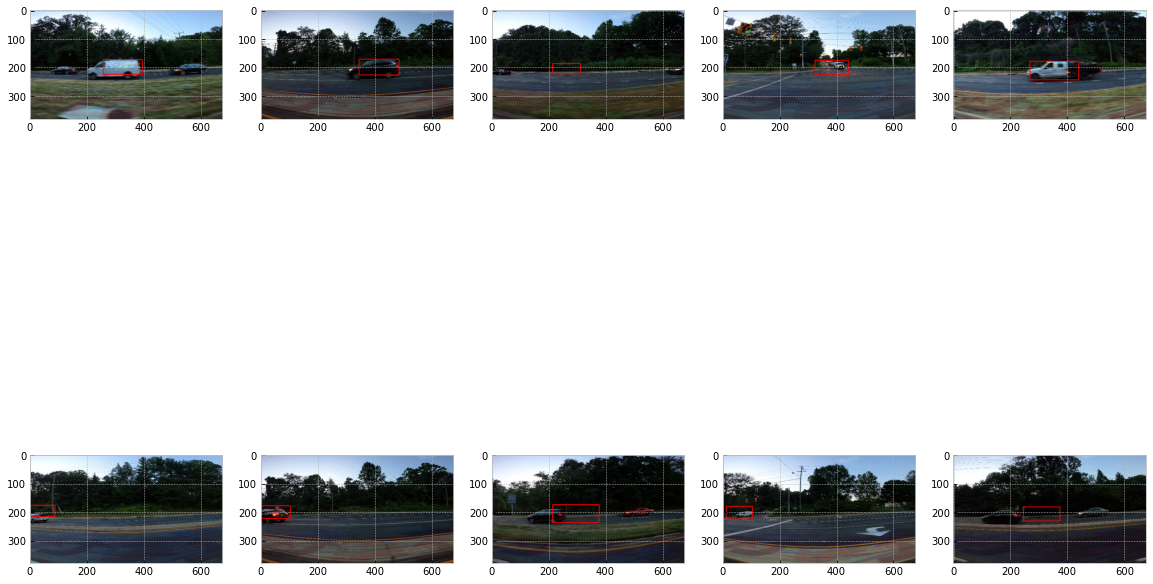

In [21]:
import cv2
# Displaying some random examples per class
fig=plt.figure(figsize=(20,15))
for i in range(10):
    fig.add_subplot(2,5,i+1)
    x= X_test_cars.reshape(len(X_test_cars),380,676,3)[i]
    cv2.rectangle(x, (y_test[i][0], y_test[i][1]), 
              (y_test[i][2], y_test[i][3]), 
              (255, 0, 0), 2);
    plt.imshow(x)
    # plt.axis('off');plt.title('Class '+str(int(y_test[j])),size=15)
plt.show()